# 02 - Dating App Matching Algorithm

### Prerequisite

In [1]:
! pip install faker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.4 MB/s eta 0:00:00a 0:00:01


### User_Profile

In [30]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

def get_input(prompt, input_type=str, default=None):
    while True:
        try:
            value = input(prompt)
            return input_type(value) if value else default
        except ValueError:
            print(f"Please enter a valid {input_type.__name__}")

def get_choice(prompt, choices):
    print(prompt)
    for i, choice in enumerate(choices, start=1):
        print(f"{i}. {choice}")
    while True:
        try:
            selection = int(input("Choose an option: "))
            if 1 <= selection <= len(choices):
                return choices[selection - 1]
            else:
                print("Please select a valid option.")
        except ValueError:
            print("Please enter a number.")

def get_file_path(prompt):
    while True:
        file_path = input(prompt)
        if os.path.isfile(file_path):
            return file_path
        else:
            print("File not found. Please enter a valid file path.")

def show_image(image_path):
    if os.path.isfile(image_path):
        img = mpimg.imread(image_path)
        imgplot = plt.imshow(img)
        plt.show()
    else:
        print("Image file not found.")

class UserProfile:
    def __init__(self, personal_info, appearance, interests, account_settings):
        self.personal_info = personal_info
        self.appearance = appearance
        self.interests = interests
        self.account_settings = account_settings

def create_profile():
    personal_info = {
        'name': get_input("Enter your name: "),
        'age': get_input("Enter your age: ", int),
        'gender': get_choice("Select your gender:", ["Male", "Female", "Non-Binary"]),
        'sexual_orientation': get_choice("Select your sexual orientation:", ["Straight", "Gay", "Lesbian", "Bisexual"]),
        'location': get_choice("Enter your location: ", ["Bangkok", "Chiang Mai", "Phuket", "Chonburi"])
    }

    appearance = {
        'height': get_input("Enter your height: ", int),
        'exercise': get_choice("Enter your exercise frequency: ", ["Everyday", "Often", "Never"]),
        'ethnicity': get_choice("Enter your ethnicity: ", ["Thai", "Chinese", "Korean"])
    }

    interests = {
        'interests': get_choice("Enter your interests: ", ["Reading", "Concert", "Netflix", "Art Gallery", "Shabu"]),
        'bio': get_input("Enter a short bio: "),
        'looking_for': get_choice("What are you looking for? ", ["Long Relationship", "Short Term", "New Friend"])
    }

    account_settings = {
        'username': get_input("Choose a username: "),
        'profile_picture': get_file_path("Enter the file path of your profile picture: ")
    }

    return UserProfile(personal_info, appearance, interests, account_settings)

In [31]:
user_profile = create_profile()

Select your gender:
1. Male
2. Female
3. Non-Binary
Select your sexual orientation:
1. Straight
2. Gay
3. Lesbian
4. Bisexual
Enter your location: 
1. Bangkok
2. Chiang Mai
3. Phuket
4. Chonburi
Enter your exercise frequency: 
1. Everyday
2. Often
3. Never
Enter your ethnicity: 
1. Thai
2. Chinese
3. Korean
Enter your interests: 
1. Reading
2. Concert
3. Netflix
4. Art Gallery
5. Shabu
What are you looking for? 
1. Long Relationship
2. Short Term
3. New Friend


Profile created for Tony, Age: 35, Location: Bangkok


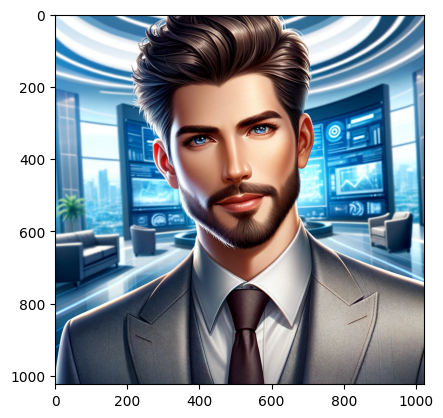

In [32]:
print(f"Profile created for {user_profile.personal_info['name']}, Age: {user_profile.personal_info['age']}, Location: {user_profile.personal_info['location']}")

profile_picture_path = user_profile.account_settings['profile_picture']
show_image(profile_picture_path)

### Random_User_Profile

In [37]:
import random
from faker import Faker
import os

fake = Faker()

def get_profile_image(gender, image_folder_path, used_images):
    all_images = os.listdir(image_folder_path)
    keywords = [gender.lower()]

    suitable_images = [img for img in all_images if img not in used_images and any(keyword in img.lower().replace('.jpg', '').replace('.png', '').split('_') for keyword in keywords)]

    selected_image = random.choice(suitable_images) if suitable_images else 'default_image.png'
    used_images.add(selected_image)
    return selected_image

used_images = set()

def generate_random_profile(image_folder_path, used_images):
    gender = random.choice(["Male", "Female", "Non-Binary"])
    interests = random.choice(["Reading", "Concert", "Netflix", "Art Gallery", "Buffet"])

    personal_info = {
        'name': fake.name(),
        'age': random.randint(18, 30),
        'gender': gender,
        'sexual_orientation': random.choice(["Straight", "Gay", "Lesbian", "Bisexual"]),
        'location': random.choice(["Bangkok", "Chiang Mai", "Phuket", "Chonburi"])
    }

    appearance = {
        'height': random.randint(150, 200),
        'exercise': random.choice(["Everyday", "Often", "Never"]),
        'ethnicity': random.choice(["Thai", "Chinese", "Korean"])
    }

    interests = {
        'interests': interests,
        'bio': fake.text(),
        'looking_for': random.choice(["Long Relationship", "Short Term", "New Friend"])
    }

    account_settings = {
        'username': fake.user_name(),
        'email': fake.email(),
        'profile_picture': get_profile_image(gender, image_folder_path, used_images)
    }

    return UserProfile(personal_info, appearance, interests, account_settings)


Profile 1:
Name: Mr. Benjamin Mills, Age: 18, Gender: Male, Location: Chonburi, Interest: Concert


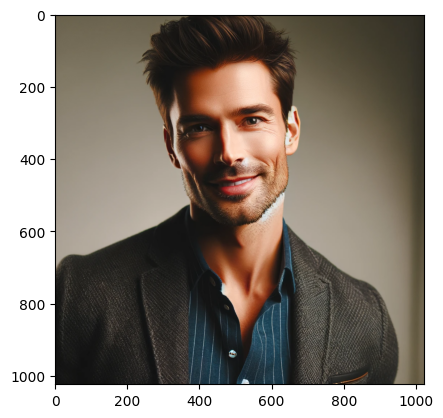


Profile 2:
Name: Matthew Rhodes, Age: 29, Gender: Female, Location: Chiang Mai, Interest: Concert


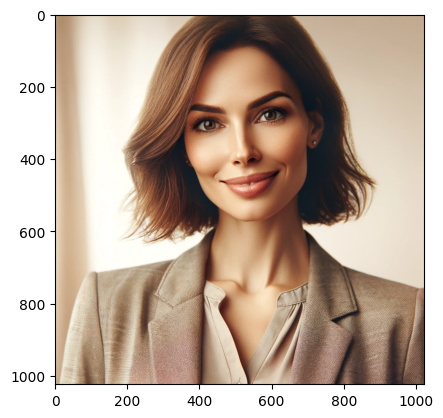


Profile 3:
Name: John Flores, Age: 24, Gender: Female, Location: Phuket, Interest: Concert


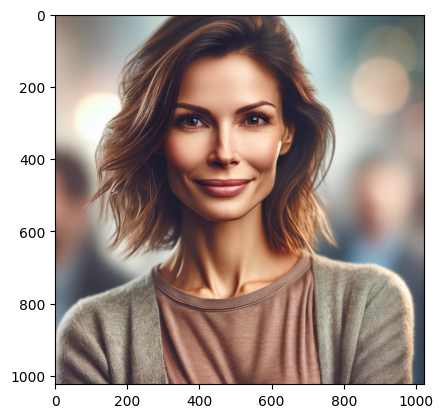


Profile 4:
Name: Krystal White, Age: 30, Gender: Female, Location: Chiang Mai, Interest: Netflix


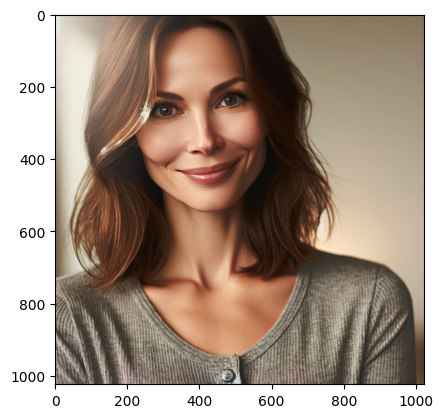


Profile 5:
Name: Meagan Castillo, Age: 27, Gender: Female, Location: Phuket, Interest: Concert


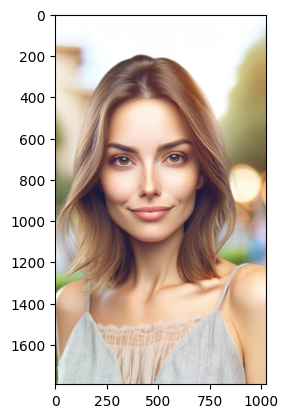


Profile 6:
Name: Tyler Perez, Age: 23, Gender: Male, Location: Phuket, Interest: Netflix


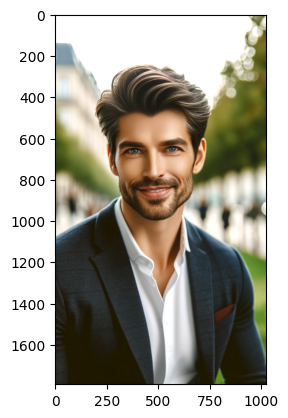


Profile 7:
Name: Ryan Wong, Age: 25, Gender: Non-Binary, Location: Chonburi, Interest: Art Gallery


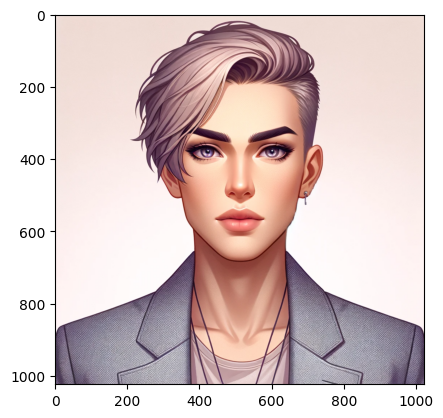


Profile 8:
Name: Cory Graham, Age: 19, Gender: Female, Location: Bangkok, Interest: Art Gallery


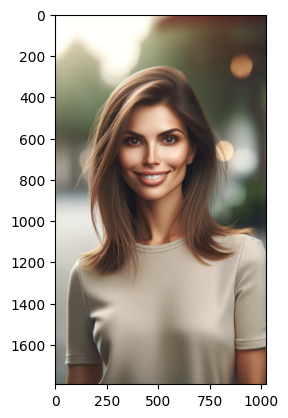


Profile 9:
Name: Susan Hill, Age: 28, Gender: Male, Location: Bangkok, Interest: Concert


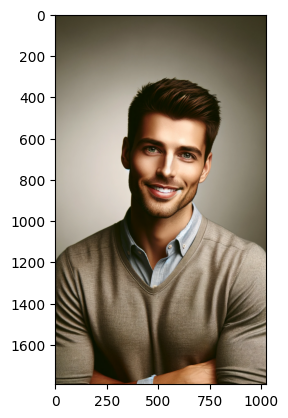


Profile 10:
Name: Kristin Navarro, Age: 21, Gender: Female, Location: Chiang Mai, Interest: Buffet


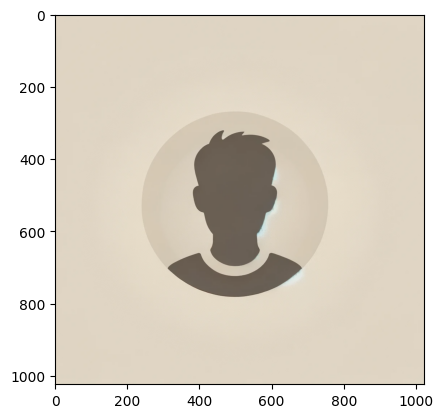

In [38]:
image_folder_path = 'user_profiles'

random_profiles = [generate_random_profile(image_folder_path, used_images) for _ in range(10)]

for i, profile in enumerate(random_profiles, start=1):
    print(f"\nProfile {i}:")
    print(f"Name: {profile.personal_info['name']}, Age: {profile.personal_info['age']}, Gender: {profile.personal_info['gender']}, Location: {profile.personal_info['location']}, Interest: {profile.interests['interests']}")
    
    profile_picture_path = os.path.join(image_folder_path, profile.account_settings['profile_picture'])
    show_image(profile_picture_path)

### Matching Score

In [39]:
def calculate_match_score(main_profile, other_profile):
    score = 0

    # Shared Interests
    shared_interests = set(main_profile.interests['interests']).intersection(set(other_profile.interests['interests']))
    score += len(shared_interests) * 10

    # Age Difference
    age_difference = abs(main_profile.personal_info['age'] - other_profile.personal_info['age'])
    if age_difference <= 5:
        score += 20

    # Sexual Orientation and Gender Compatibility
    if main_profile.personal_info['sexual_orientation'] == other_profile.personal_info['sexual_orientation']:
        score += 30

    # Exercise Habits
    if main_profile.appearance['exercise'] == other_profile.appearance['exercise']:
        score += 15

    # Looking For
    if main_profile.interests['looking_for'] == other_profile.interests['looking_for']:
        score += 25

    return score

matches = [(profile, calculate_match_score(user_profile, profile)) for profile in random_profiles]

sorted_matches = sorted(matches, key=lambda x: x[1], reverse=True)

for match in sorted_matches[:5]:
    profile, score = match
    print(f"Match Score: {score}, Profile: {profile.personal_info['name']}")

Match Score: 75, Profile: Susan Hill
Match Score: 70, Profile: Krystal White
Match Score: 50, Profile: Mr. Benjamin Mills
Match Score: 50, Profile: Ryan Wong
Match Score: 35, Profile: Matthew Rhodes
